# King County House Data - Multivariate Regression

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
<br> The data source can be found here: https://www.kaggle.com/harlfoxem/housesalesprediction/data<br> <br>The analysis consists of the following steps.
-  I. Importing necessary libraries, downloading the data and viewing it in a dataframe
-  II. Running an Ordinary Least Squares (OLS) regression with all variables included
-  III. Scaling/normalizing the variables into the same range to compare the coefficients
-  IV. Creating a model using the chosen variables
-   V. Checking the variables' correlations and distributions
-   VI. Plotting actual prices against prices predicted by the model
-   VII. Conclusions

In [23]:
import pandas as pd
import os
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

df = pd.read_excel("C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/data_sets/KingsCountyHouseData/kc_house_data.xls")


Let's start by viewing the data in a dataframe.<br> 

In [10]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,views,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9106000005,20150527T000000,1310000.0,4,2.25,3750,5000,2.0,1,1,...,8,2440,1310,1924,0,98115,47.6747,-122.303,2170,4590
1,5101400871,20150524T000000,445500.0,2,1.75,1390,6670,1.0,1,1,...,6,720,670,1941,0,98115,47.6914,-122.308,920,6380
2,7923600250,20150515T000000,450000.0,5,2.00,1870,7344,1.5,1,1,...,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650
3,4166600610,20150514T000000,335000.0,3,2.00,1410,44866,1.0,1,1,...,7,1410,0,1985,0,98023,47.3273,-122.370,2950,29152
4,5057100110,20150514T000000,479349.0,5,3.00,3223,6371,2.0,1,1,...,9,3223,0,2014,0,98042,47.3584,-122.163,1979,9008


There are 18 variables that can be used for estimating prices. We could start by checking out what a model using all variables woudl look like. Obviously we leave variables "id" and "date" out of the analysis. <br> We use Ordinary Least Squares (OLS) from statsmodels library.

In [3]:
X = df[['bedrooms','bathrooms', 'sqft_living','sqft_lot','floors','waterfront','views','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']]
y = df['price']

X1 = sm.add_constant(X)
est = sm.OLS(y, X1).fit()

est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2219.
Date:                Mon, 11 Dec 2017   Prob (F-statistic):               0.00
Time:                        20:30:37   Log-Likelihood:            -2.2333e+05
No. Observations:               16383   AIC:                         4.467e+05
Df Residuals:                   16365   BIC:                         4.468e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.638e+06   3.35e+06      1.086      0.277   -2.93e+06    1.02e+07
bedrooms      -4.011e+04   2264.700    -17.710      0.000   -4.45e+04   -3.57e+04
bathrooms      4.659e+04   3753.782     12.412      0.000    3.92e+04     5.4e+04
sqft_living     111.1252      2.649     41.955      0.000     105.933     116.317
sqft_lot          0.1802      0.053      3.406      0.001       0.076       0.284
floors         4504.6247   4131.809      1.090      0.276   -3594.170    1.26e+04
waterfront     5.733e+05   1.99e+04     28.861      0.000    5.34e+05    6.12e+05
views          5.314e+04   2462.756     21.577      0.000    4.83e+04     5.8e+04
condition      2.516e+04   2720.671      9.247      0.000    1.98e+04    3.05e+04
grade          9.717e+04   2474.398     39.269      0.000    9.23e+04    1.02e+05
sqft_above       71.3484      2.602     27.417      0.000      66.247      76.449
sqft_basement    39.7774      3.061     12.997      0.000      33.778      45.776
yr_built      -2692.4372     83.851    -32.110      0.000   -2856.793   -2528.081
yr_renovated     15.7737      4.277      3.688      0.000       7.391      24.156
zipcode        -537.6065     37.751    -14.241      0.000    -611.602    -463.611
lat            5.972e+05   1.22e+04     48.813      0.000    5.73e+05    6.21e+05
long           -2.02e+05   1.51e+04    -13.340      0.000   -2.32e+05   -1.72e+05
sqft_living15    20.2805      3.999      5.072      0.000      12.443      28.118
sqft_lot15       -0.3863      0.082     -4.685      0.000      -0.548      -0.225
==============================================================================
Omnibus:                    13975.340   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1405964.087
Skew:                           3.583   Prob(JB):                         0.00
Kurtosis:                      47.814   Cond. No.                     5.51e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.48e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<br>R-squared is almost 0.70, which isn't too bad. However, with 18 variables this would be a far too complicated model. Let's see if we can start simplifying it by cutting the number of variables. <br><br>With all the categorical values included, it should be safe to assume all data points are not normally distributed. Therefore, trying to choose the variables with the lowest standard errors does not really work. We will instead standardize the data first. <br><br> With the variables normalized we can compare them and choose the ones with highest coefficient values for our model.<br>

In [4]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df.loc[:,('bedrooms','bathrooms', 'sqft_living','sqft_lot','floors','waterfront','views','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15')]
y = df['price']

X[['bedrooms','bathrooms', 'sqft_living','sqft_lot','floors','waterfront','views','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']] = scale.fit_transform(X[['bedrooms','bathrooms', 'sqft_living','sqft_lot','floors','waterfront','views','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']].as_matrix())

est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     274.9
Date:                Mon, 11 Dec 2017   Prob (F-statistic):               0.00
Time:                        20:30:41   Log-Likelihood:            -2.4044e+05
No. Observations:               16383   AIC:                         4.809e+05
Df Residuals:                   16366   BIC:                         4.810e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.639e+04   5838.035     -6.233      0.000   -4.78e+04   -2.49e+04
bathrooms      3.576e+04   8185.978      4.369      0.000    1.97e+04    5.18e+04
sqft_living    8.146e+04   5205.466     15.648      0.000    7.13e+04    9.17e+04
sqft_lot       7821.8183   6524.188      1.199      0.231   -4966.300    2.06e+04
floors         2433.1339   6341.062      0.384      0.701   -9996.039    1.49e+04
waterfront     5.008e+04   4930.236     10.158      0.000    4.04e+04    5.97e+04
views          4.073e+04   5362.688      7.594      0.000    3.02e+04    5.12e+04
condition      1.617e+04   4969.042      3.254      0.001    6431.297    2.59e+04
grade          1.138e+05   8236.907     13.821      0.000    9.77e+04     1.3e+05
sqft_above     7.588e+04   5521.781     13.741      0.000    6.51e+04    8.67e+04
sqft_basement  2.666e+04   5062.232      5.266      0.000    1.67e+04    3.66e+04
yr_built      -7.882e+04   6974.400    -11.301      0.000   -9.25e+04   -6.51e+04
yr_renovated   6193.6269   4771.173      1.298      0.194   -3158.391    1.55e+04
zipcode       -2.892e+04   5769.950     -5.012      0.000   -4.02e+04   -1.76e+04
lat            8.365e+04   4868.756     17.180      0.000    7.41e+04    9.32e+04
long          -2.834e+04   6035.772     -4.695      0.000   -4.02e+04   -1.65e+04
sqft_living15  1.374e+04   7697.345      1.785      0.074   -1347.038    2.88e+04
sqft_lot15    -1.084e+04   6573.967     -1.649      0.099   -2.37e+04    2044.812
==============================================================================
Omnibus:                    13975.340   Durbin-Watson:                   0.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1405964.087
Skew:                           3.583   Prob(JB):                         0.00
Kurtosis:                      47.814   Cond. No.                     3.31e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.81e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<br> We may disregard the low R-squared, since we are only looking at the sizes of the **normalized coefficients**. The eight largest, in descending order, are (size of coefficient in brackets):
- **grade** (113 800) = Classification by construction quality. Buildings of better quality (higher grade) cost more to build.
- **lat**	(83 650) = Latitude
- **sqft_living**	(81 460) = The total square footage of the house
- **yr_built**	(78 820) = The year the house was built 
- **sqft_above**	(75 880) = sqft_living - sqft_basement
- **waterfront**	(50 080) = A dummy variable, 0 or 1, for whether the apartment was overlooking the waterfront or not 
- **view**	(40 730) = An index from 0 to 4 of how good the view of the property was
- **bedrooms**	(36 390) = Number of bedrooms in the house<br>
<br>From a common sense perspective, there is a chance that  *sqft_living* and *sqft_above* are highly correlated. Therefore, including both in the model would not add any value. Let's check.

In [5]:
df_sqft = df[['sqft_living', 'sqft_above']]
df_sqft.corr() 

,sqft_living,sqft_above
sqft_living,1.000000,0.876592
sqft_above,0.876592,1.000000


True enough; they are highly correlated. We leave variable *sqft_above* out.<br><br>
Next, let's see what a model with these seven variables would look like.

In [6]:
X = df[[ 'bedrooms','sqft_living','waterfront', 'views', 'grade','yr_built','lat']]
y = df['price']

X1 = sm.add_constant(X)
est = sm.OLS(y, X1).fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     5095.
Date:                Mon, 11 Dec 2017   Prob (F-statistic):               0.00
Time:                        20:30:41   Log-Likelihood:            -2.2365e+05
No. Observations:               16383   AIC:                         4.473e+05
Df Residuals:                   16375   BIC:                         4.474e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.268e+07   6.06e+05    -37.446      0.000   -2.39e+07   -2.15e+07
bedrooms     -3.08e+04   2236.971    -13.767      0.000   -3.52e+04   -2.64e+04
sqft_living   194.9442      3.242     60.125      0.000     188.589     201.300
waterfront   5.863e+05   2.02e+04     29.041      0.000    5.47e+05    6.26e+05
views        5.242e+04   2433.458     21.541      0.000    4.76e+04    5.72e+04
grade        1.116e+05   2323.767     48.013      0.000    1.07e+05    1.16e+05
yr_built    -2571.0702     64.579    -39.813      0.000   -2697.652   -2444.489
lat          5.568e+05   1.19e+04     46.797      0.000    5.34e+05     5.8e+05
==============================================================================
Omnibus:                    13958.723   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1361480.808
Skew:                           3.587   Prob(JB):                         0.00
Kurtosis:                      47.080   Cond. No.                     1.11e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With less than half of the original number of variables we end up with a model close to same R-squared as with all 18 variables; 0.69.<br><br> 
The chosen variables with their coefficients​ for the model for predicting house prices are<br><br>
-&nbsp;&nbsp;&nbsp;&nbsp;**constant** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-22 680 000,00<br>
-&nbsp;&nbsp;&nbsp;&nbsp;**bedrooms**	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-30 800,00<br>
-&nbsp;&nbsp;&nbsp;&nbsp;**sqft_living**	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;194,94<br>
-&nbsp;&nbsp;&nbsp;&nbsp;**waterfront**	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;586 300,00<br>
-&nbsp;&nbsp;&nbsp;&nbsp;**views**-&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;52 420,00<br>
-&nbsp;&nbsp;&nbsp;&nbsp;**grade**	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;111 600,00<br>
-&nbsp;&nbsp;&nbsp;&nbsp;**yr_built**	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-2 571,07<br>
-&nbsp;&nbsp;&nbsp;&nbsp;**lat**	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;556 800,00<br><br> And the "scientific" model:



$$ \large PriceEstimate = 
\beta_{Constant} + \beta_{Bedrooms}*x_{Bedrooms} + \beta_{SqftLiving}*x_{SqftLiving} + \\ \large \beta_{Waterfront}*x_{Waterfront} + \beta_{Views}*x_{Views} + \beta_{Grade}*x_{Grade} + \beta_{YrBuilt}*x_{YrBuilt} + \beta_{Lat}*x_{Lat} $$

<br>Let's now create a correlation matrix of the variables, to see we've actually eliminated the variables with the highest correlations.

In [7]:
df_sub = df[['price','bedrooms','sqft_living','waterfront', 'views', 'grade','yr_built','lat']]
df_sub.corr() 


,price,bedrooms,sqft_living,waterfront,views,grade,yr_built,lat
price,1.000000,0.308285,0.697141,0.267934,0.397933,0.666022,0.061409,0.310230
bedrooms,0.308285,1.000000,0.589745,-0.008003,0.071481,0.363801,0.164031,-0.013624
sqft_living,0.697141,0.589745,1.000000,0.099415,0.278108,0.760734,0.327495,0.050831
waterfront,0.267934,-0.008003,0.099415,1.000000,0.412503,0.084936,-0.027792,-0.008777
views,0.397933,0.071481,0.278108,0.412503,1.000000,0.248612,-0.049968,0.012595
grade,0.666022,0.363801,0.760734,0.084936,0.248612,1.000000,0.456114,0.113637
yr_built,0.061409,0.164031,0.327495,-0.027792,-0.049968,0.456114,1.000000,-0.150278
lat,0.310230,-0.013624,0.050831,-0.008777,0.012595,0.113637,-0.150278,1.000000


Also a quick look at the correlation matrix as a heatmap:

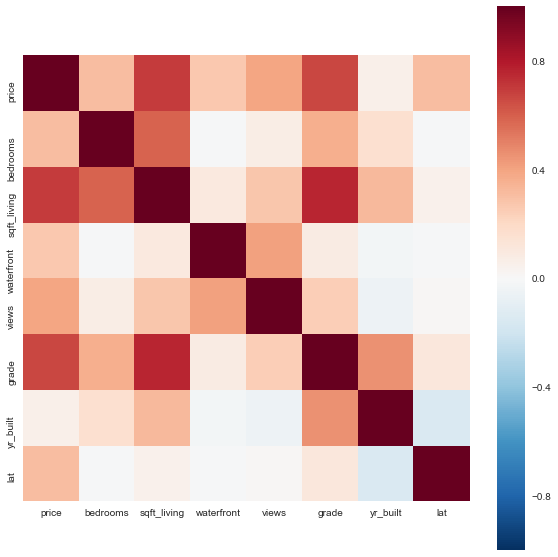

In [8]:
corrmat = df_sub.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=1, square=True);
plt.show()


With the remaining variables, let's see if our assumption in the beginning of the data not being normally distributed still holds.

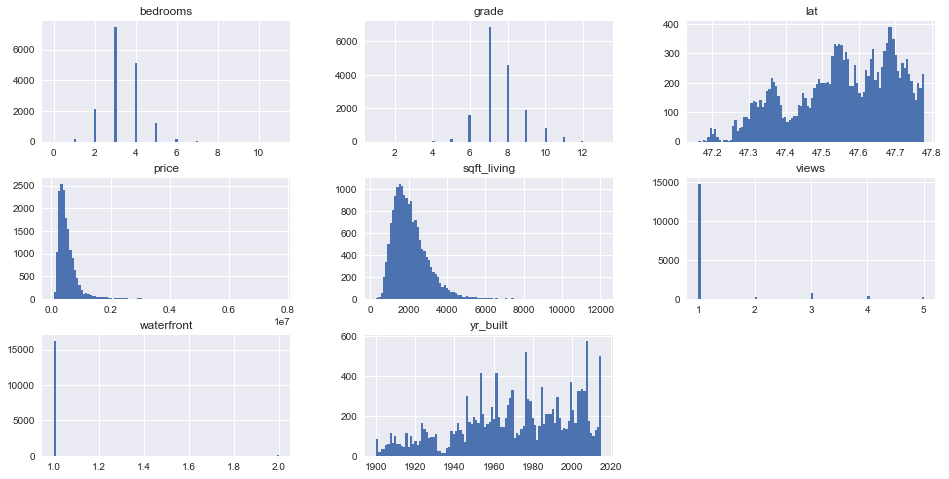

In [16]:
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0]=16.0
fig_size[1]=8.0
df_sub.hist(bins=100)
plt.show()

And sure enough, only *bedrooms, grade* and *sqft_living* - less than half of our variables - come close to resembling normal distribution. <BR><BR>
Next, we iterate through the original 21-column dataframe, using the chosen variables. The *row[n]* targets the variable columns in the dataframe. The resulting **price_estimates** is a list with an estimated price for each of the 16300+ houses in the data using the model we've created.

In [18]:

for index, row in df.iterrows():

    Constant = (est.params.const)
    Bedrooms = row[3]*(est.params.bedrooms)
    Sqft_living = row[5]*(est.params.sqft_living)
    Waterfront = row[8]*(est.params.waterfront)
    Views = row[9]*(est.params.views)
    Grade = row[11]*(est.params.grade)
    Year_built = row[14]*(est.params.yr_built)
    Latitude = row[17]*(est.params.lat)
    
    price_estimates = ([index, row[1], Constant+Bedrooms+Sqft_living+Waterfront+Views+Grade+Year_built+Latitude][2])
     

We then create a new data frame containing the price estimates we receive using the model:


In [19]:

df_estimates = pd.read_excel("C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/data_sets/KingsCountyHouseData/kc_house_data_estimates.xls")


Finally, we're ready to plot the price estimates for each house against the actual price of each house!

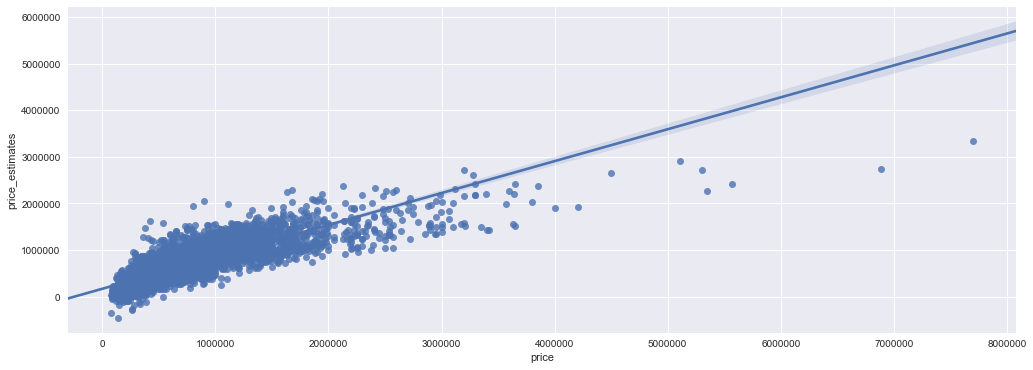

In [20]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x="price", y="price_estimates", data=df_estimates, ax=ax)
plt.show()

Plotting prices and estimates in a histogram. First with all data. Then with prices up to only USD1,5mio to make the differences clearer. 97,7% of the data are houses with a price of 1,5mio or lower 

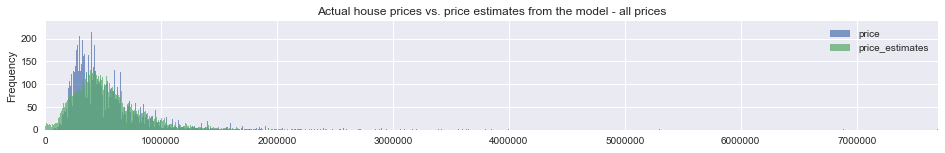

In [21]:
fig_size[0]=16.0
fig_size[1]=2.0
df_estimates.plot(bins=2000, kind='hist', alpha=0.7)

plt.title('Actual house prices vs. price estimates from the model - all prices')
axes=plt.axes()
axes.set_xlim([0,7700000])
#axes.set_ylim([0,20])
plt.show()

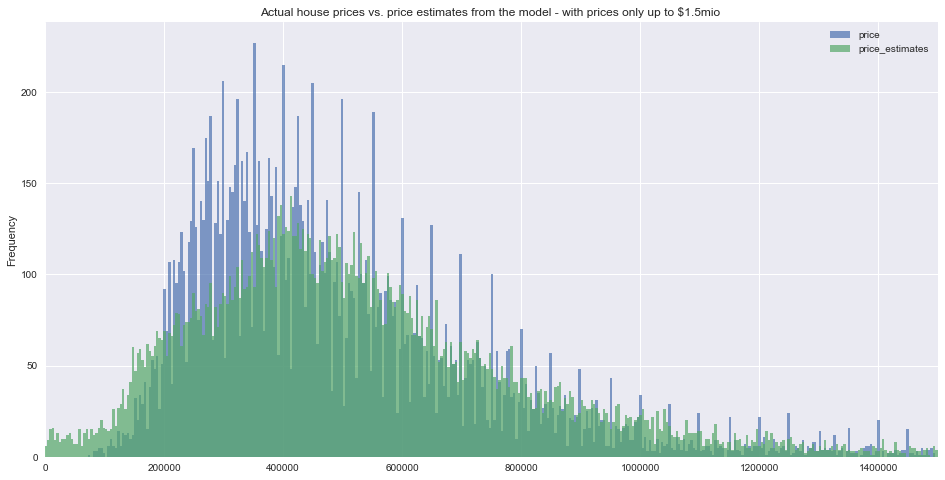

In [22]:
fig_size[0]=16.0
fig_size[1]=8.0
df_estimates.plot(bins=2000, kind='hist', alpha=0.7)

plt.title('Actual house prices vs. price estimates from the model - with prices only up to $1.5mio ')
axes=plt.axes()
axes.set_xlim([0,1500000])
plt.show()

# Conclusions
- The actual prices have a positive skew. This is in line with similar statistics showing household income. Both income and house prices usually correlate with each other.<br>
- The R-squared of the final model wasn't extremly high, c. 0.70. However, I did a quick analysis (not shown in this notebook) with only prices of up to $1.5mio, to remove the "outliers". With the chosen seven variables, the R-squared rose only to 0.71, though. This would indicate, that with a model based on OLS you capture only around 70% of the variance in the data, at best.<br>
- This can also be seen in the graph above; price estimates from the model tend to be more evenly distributed with a lower kurtosis. Our model is not able to cover all the peaks in the actual prices.

